<a href="https://colab.research.google.com/github/devkishorre0201/Car-Damage-Detection-/blob/main/Car_Damage_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle -q

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.listdir("/content/drive/MyDrive")

['Colab Notebooks',
 "Bekhayali (Time's Fresh Face) {Dev}.m4a",
 'DevKishorre_TFF_City_Finals_Track.m4a',
 'Janam Janam TFF track (Dev Kishorre).m4a',
 'Dev Kishorre_TFF_WC.mp4',
 'ilovepdf_merged (1).pdf',
 'SPM_LAB2.docx',
 'data1a']

In [4]:
data_dir = "/content/drive/MyDrive/data1a"

for root, dirs, files in os.walk(data_dir):
    print(root, len(files))
    print(files[:5])
    break

/content/drive/MyDrive/data1a 1
['.DS_Store']


In [5]:
import os

data_dir = "/content/drive/MyDrive/data1a"

for root, dirs, files in os.walk(data_dir):
    print(root, "| Dirs:", dirs, "| Files:", files[:5])


/content/drive/MyDrive/data1a | Dirs: ['validation', 'training'] | Files: ['.DS_Store']
/content/drive/MyDrive/data1a/validation | Dirs: ['00-damage', '01-whole'] | Files: []
/content/drive/MyDrive/data1a/validation/00-damage | Dirs: [] | Files: ['0122.jpeg', '0043.jpeg', '0136.JPEG', '0150.JPEG', '0038.JPEG']
/content/drive/MyDrive/data1a/validation/01-whole | Dirs: [] | Files: ['0070.jpg', '0109.jpg', '0040.jpg', '0113.jpg', '0006.jpg']
/content/drive/MyDrive/data1a/training | Dirs: ['00-damage', '01-whole'] | Files: ['.DS_Store']
/content/drive/MyDrive/data1a/training/00-damage | Dirs: [] | Files: ['0012.JPEG', '0017.JPEG', '0006.JPEG', '0003.JPEG', '0019.JPEG']
/content/drive/MyDrive/data1a/training/01-whole | Dirs: [] | Files: ['0021.jpg', '0038.jpg', '0026.jpg', '0002.jpg', '0008.jpg']


In [6]:
data_dir = "/content/drive/MyDrive/data1a"
train_dir = data_dir + "/training"
val_dir   = data_dir + "/validation"

In [7]:
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

train_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

In [8]:
train_data = datasets.ImageFolder(train_dir, transform=train_transforms)
val_data   = datasets.ImageFolder(val_dir, transform=val_transforms)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_data, batch_size=32, shuffle=False)

print("Classes:", train_data.classes)
print("Train samples:", len(train_data))
print("Validation samples:", len(val_data))

Classes: ['00-damage', '01-whole']
Train samples: 1840
Validation samples: 460


In [9]:
from torch.utils.data import random_split

val_size = len(val_data)
test_size = val_size // 2
val_size = val_size - test_size

val_data, test_data = random_split(val_data, [val_size, test_size])

from torch.utils.data import DataLoader
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

print("Train:", len(train_data), "Val:", len(val_data), "Test:", len(test_data))

Train: 1840 Val: 230 Test: 230


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim

In [11]:
from torchvision import models

model = models.resnet18(pretrained=True)


for param in model.parameters():
    param.requires_grad = False
num_classes = 2
model.fc = nn.Linear(512, num_classes)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

print(model)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 44.7M/44.7M [00:01<00:00, 26.0MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

In [13]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_data, batch_size=32, shuffle=False)

In [14]:
def train_model(model, criterion, optimizer, train_loader, val_loader, epochs=5):
    for epoch in range(epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        train_acc = 100. * correct / total
        val_acc = evaluate(model, val_loader)

        print(f"Epoch [{epoch+1}/{epochs}] | Loss: {running_loss/len(train_loader):.4f} "
              f"| Train Acc: {train_acc:.2f}% | Val Acc: {val_acc:.2f}%")


In [15]:
def evaluate(model, data_loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    return 100. * correct / total

train_model(model, criterion, optimizer, train_loader, val_loader, epochs=5)

Epoch [1/5] | Loss: 0.5062 | Train Acc: 74.40% | Val Acc: 82.61%
Epoch [2/5] | Loss: 0.3611 | Train Acc: 84.73% | Val Acc: 85.65%
Epoch [3/5] | Loss: 0.3135 | Train Acc: 87.39% | Val Acc: 90.00%
Epoch [4/5] | Loss: 0.3042 | Train Acc: 88.10% | Val Acc: 86.52%
Epoch [5/5] | Loss: 0.3016 | Train Acc: 87.39% | Val Acc: 90.87%


In [16]:
test_acc = evaluate(model, test_loader)
print(f"Final Test Accuracy: {test_acc:.2f}%")

Final Test Accuracy: 91.74%


In [17]:
import matplotlib.pyplot as plt

In [18]:

from tqdm import tqdm

def train_model_with_history(model, train_loader, val_loader, criterion, optimizer, epochs=10):
    history = {"train_loss": [], "val_loss": [], "train_acc": [], "val_acc": []}

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct, total = 0, 0
        for inputs, labels in tqdm(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (preds == labels).sum().item()
        epoch_train_loss = running_loss / total
        epoch_train_acc  = correct / total * 100

        model.eval()
        running_loss, correct, total = 0.0, 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                running_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (preds == labels).sum().item()
        epoch_val_loss = running_loss / total
        epoch_val_acc  = correct / total * 100

        history["train_loss"].append(epoch_train_loss)
        history["val_loss"].append(epoch_val_loss)
        history["train_acc"].append(epoch_val_acc) # Corrected to epoch_val_acc
        history["val_acc"].append(epoch_val_acc)

        print(f"Epoch [{epoch+1}/{epochs}] "
              f"Train Loss: {epoch_train_loss:.4f}, Acc: {epoch_train_acc:.2f}% | "
              f"Val Loss: {epoch_val_loss:.4f}, Acc: {epoch_val_acc:.2f}%")

    return history

history = train_model_with_history(model, train_loader, val_loader, criterion, optimizer, epochs=10)

100%|██████████| 58/58 [00:15<00:00,  3.75it/s]


Epoch [1/10] Train Loss: 0.2718, Acc: 89.18% | Val Loss: 0.2383, Acc: 90.43%


100%|██████████| 58/58 [00:15<00:00,  3.64it/s]


Epoch [2/10] Train Loss: 0.2606, Acc: 89.78% | Val Loss: 0.2823, Acc: 86.96%


100%|██████████| 58/58 [00:15<00:00,  3.74it/s]


Epoch [3/10] Train Loss: 0.2615, Acc: 89.13% | Val Loss: 0.2870, Acc: 86.96%


100%|██████████| 58/58 [00:15<00:00,  3.73it/s]


Epoch [4/10] Train Loss: 0.2813, Acc: 89.13% | Val Loss: 0.2100, Acc: 92.17%


100%|██████████| 58/58 [00:16<00:00,  3.59it/s]


Epoch [5/10] Train Loss: 0.2682, Acc: 88.48% | Val Loss: 0.2320, Acc: 91.30%


100%|██████████| 58/58 [00:15<00:00,  3.75it/s]


Epoch [6/10] Train Loss: 0.2554, Acc: 89.89% | Val Loss: 0.2417, Acc: 91.30%


100%|██████████| 58/58 [00:15<00:00,  3.79it/s]


Epoch [7/10] Train Loss: 0.2612, Acc: 88.75% | Val Loss: 0.2643, Acc: 90.43%


100%|██████████| 58/58 [00:16<00:00,  3.60it/s]


Epoch [8/10] Train Loss: 0.2592, Acc: 88.91% | Val Loss: 0.2196, Acc: 91.74%


100%|██████████| 58/58 [00:15<00:00,  3.70it/s]


Epoch [9/10] Train Loss: 0.2446, Acc: 89.73% | Val Loss: 0.2914, Acc: 87.39%


100%|██████████| 58/58 [00:18<00:00,  3.09it/s]


Epoch [10/10] Train Loss: 0.2469, Acc: 89.29% | Val Loss: 0.2295, Acc: 91.30%


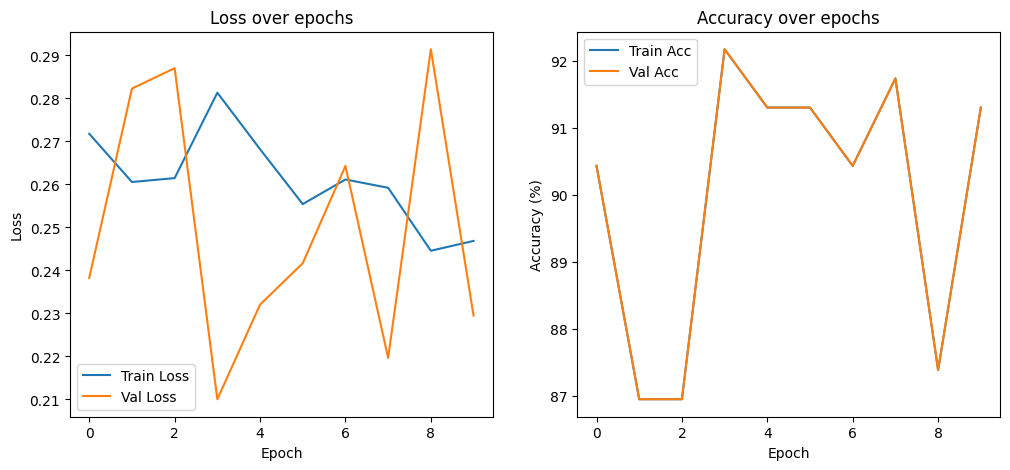

In [19]:
plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(history["train_loss"], label="Train Loss")
plt.plot(history["val_loss"], label="Val Loss")
plt.title("Loss over epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history["train_acc"], label="Train Acc")
plt.plot(history["val_acc"], label="Val Acc")
plt.title("Accuracy over epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()

plt.show()


In [20]:
for name, param in model.named_parameters():
    if "layer4" in name or "fc" in name:  # last block + fully connected
        param.requires_grad = True
    else:
        param.requires_grad = False

In [21]:
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-5)


In [22]:
history_finetune = train_model_with_history(model, train_loader, val_loader, criterion, optimizer, epochs=5)

100%|██████████| 58/58 [00:16<00:00,  3.51it/s]


Epoch [1/5] Train Loss: 0.2260, Acc: 90.65% | Val Loss: 0.2064, Acc: 92.61%


100%|██████████| 58/58 [00:16<00:00,  3.53it/s]


Epoch [2/5] Train Loss: 0.2041, Acc: 91.90% | Val Loss: 0.1918, Acc: 93.04%


100%|██████████| 58/58 [00:16<00:00,  3.44it/s]


Epoch [3/5] Train Loss: 0.1816, Acc: 93.26% | Val Loss: 0.1742, Acc: 93.48%


100%|██████████| 58/58 [00:16<00:00,  3.54it/s]


Epoch [4/5] Train Loss: 0.1454, Acc: 93.97% | Val Loss: 0.1652, Acc: 93.04%


100%|██████████| 58/58 [00:17<00:00,  3.41it/s]


Epoch [5/5] Train Loss: 0.1350, Acc: 95.11% | Val Loss: 0.1615, Acc: 93.04%


In [23]:
torch.save(model.state_dict(), "car_damage_resnet_finetuned.pth")
print(" Model saved successfully")

 Model saved successfully


In [24]:
import os
import pandas as pd
from PIL import Image
import torch
from torchvision import transforms, models
import torch.nn as nn

In [25]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet18(pretrained=False) # Changed to resnet18
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)  # 2 classes
model.load_state_dict(torch.load("car_damage_resnet_finetuned.pth", map_location=device))
model = model.to(device)
model.eval()

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [26]:
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])


In [27]:
class_names = train_data.classes

In [28]:
image_folder = "/content/drive/MyDrive/data1a/test"

In [29]:
image_paths = []
for root, dirs, files in os.walk(image_folder):
    for f in files:
        if f.lower().endswith((".jpg", ".jpeg", ".png")):
            image_paths.append(os.path.join(root, f))


In [30]:
results = []
for img_path in image_paths:
    img = Image.open(img_path).convert("RGB")
    img_t = transform(img).unsqueeze(0).to(device)
    with torch.no_grad():
        outputs = model(img_t)
        _, pred = torch.max(outputs, 1)
    results.append({
        "image_path": img_path,
        "prediction": class_names[pred.item()]
    })


In [31]:
df = pd.DataFrame(results)
df.to_csv("car_damage_predictions.csv", index=False)
print(" Predictions saved to car_damage_predictions.csv")

 Predictions saved to car_damage_predictions.csv


In [32]:
!pip install gradio -q


In [33]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the fine-tuned model
model = models.resnet18(pretrained=False) # Changed to resnet18
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)  # 2 classes
model.load_state_dict(torch.load("car_damage_resnet_finetuned.pth", map_location=device))
model = model.to(device)
model.eval()

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [34]:
class_names = ["00-damage", "01-whole"]

# Transform
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

In [35]:
def predict_car_damage(image):
    # image is a PIL Image from Gradio
    img_t = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        outputs = model(img_t)
        probabilities = torch.softmax(outputs, dim=1)[0]
    return {class_names[i]: float(probabilities[i]) for i in range(len(class_names))}

In [36]:
import gradio as gr

iface = gr.Interface(
    fn=predict_car_damage,
    inputs=gr.Image(type="pil"),
    outputs=gr.Label(num_top_classes=2),
    title="Car Damage Detection",
    description="Upload a car image to check if it is damaged or whole."
)

iface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://206d8e4d4d85cda03b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
